# 1. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

In [3]:
estate = pd.read_csv('data/seoul_real_estate.csv')
estate.head()

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2024,11620,관악구,10100,봉천동,1.0,대지,969.0,51.0,리더스 오피스텔,...,12500,17.60,22.13,2.0,NaN,NaN,2003.0,오피스텔,중개거래,서울 관악구
1,2024,11260,중랑구,10300,중화동,1.0,대지,329.0,25.0,해피리움빌,...,27000,29.89,21.00,2.0,NaN,NaN,2019.0,연립다세대,중개거래,서울 중랑구
2,2024,11740,강동구,10500,길동,1.0,대지,415.0,13.0,강동큐브(2차),...,11500,12.52,0.00,13.0,NaN,NaN,2013.0,아파트,중개거래,서울 강동구
3,2024,11215,광진구,10200,능동,1.0,대지,240.0,7.0,(240-7),...,29000,55.69,28.00,2.0,NaN,NaN,1997.0,연립다세대,중개거래,서울 광진구
4,2024,11680,강남구,11500,수서동,1.0,대지,713.0,0.0,수서현대벤쳐빌,...,18550,25.45,36.36,5.0,NaN,NaN,2002.0,오피스텔,중개거래,서울 강남구


In [4]:
submission = pd.read_csv('submission.csv', index_col=0)
submission.head()

FileNotFoundError: [Errno 2] No such file or directory: 'submission.csv'

# 2. 데이터 구조 확인

In [ ]:
estate.columns

In [ ]:
estate.describe()

In [ ]:
estate.info()

In [ ]:
estate.isnull().sum()

# 3. 중복값 확인, 제거

In [ ]:
estate.duplicated().sum()

In [ ]:
estate[estate.duplicated()].head()

In [ ]:
estate.drop_duplicates(inplace=True)

In [ ]:
#코드와 중복되는 이름값들, 집값 예측과 관련이 없는 정보들 제거

In [ ]:
estate.drop(['접수연도', '자치구명', '법정동명', '지번구분명', '본번', '부번', '취소일', '신고한 개업공인중개사 시군구명'], axis = 1, inplace = True)
estate.info()

In [ ]:
#건물명은 결측치 처리를 위해 남겨둠

# 4. 결측치 확인, 제거

In [ ]:
estate.isnull().sum()

# 4-1 자치구코드

In [ ]:
# 자치구코드 26230 이상한 것 교체

In [ ]:
estate['자치구코드'].unique()

In [ ]:
estate[estate['자치구코드']==26230]

In [5]:
# 자치구코드 26230은 부산에서 사용하는 코드로 변경이 필요할 것으로 보임
# 법정동명이 미아동으로 확인되었으며, 미아동의 법정동코드가 10100이라는 것도 확인함
# 자치구코드를 강북구의 자치구코드에 해당하는 11305로 변경

In [6]:
estate['자치구코드'] = estate['자치구코드'].replace(26230,11305)

# 4-2 지번구분

In [7]:
estate[estate['지번구분'].isnull()]

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
21,2024,11110,종로구,15300,돈의동,NaN,NaN,NaN,NaN,NaN,...,22000,26.44,18.0,NaN,NaN,NaN,1911.0,단독다가구,직거래,NaN
85,2024,11590,동작구,10300,상도1동,NaN,NaN,NaN,NaN,NaN,...,114000,174.42,103.0,NaN,NaN,NaN,1992.0,단독다가구,중개거래,서울 동작구
165,2024,11305,강북구,10100,미아동,NaN,NaN,NaN,NaN,NaN,...,82739,195.78,115.0,NaN,NaN,NaN,1992.0,단독다가구,직거래,NaN
167,2024,11305,강북구,10300,수유동,NaN,NaN,NaN,NaN,NaN,...,108241,277.17,169.0,NaN,NaN,NaN,1988.0,단독다가구,직거래,NaN
168,2024,11200,성동구,11500,성수동2가,NaN,NaN,NaN,NaN,NaN,...,250000,149.18,119.0,NaN,NaN,NaN,1993.0,단독다가구,중개거래,서울 성동구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63796,2024,11620,관악구,10200,신림동,NaN,NaN,NaN,NaN,NaN,...,75000,141.39,132.0,NaN,NaN,20240308.0,1985.0,단독다가구,중개거래,서울 관악구
63820,2024,11680,강남구,11100,세곡동,NaN,NaN,NaN,NaN,NaN,...,520000,165.54,461.0,NaN,NaN,20240117.0,1982.0,단독다가구,중개거래,서울 송파구
63989,2024,11230,동대문구,10500,답십리동,NaN,NaN,NaN,NaN,NaN,...,23000,14.88,34.0,NaN,NaN,NaN,1900.0,단독다가구,중개거래,서울 동대문구
64014,2024,11440,마포구,11000,노고산동,NaN,NaN,NaN,NaN,NaN,...,195000,157.45,116.7,NaN,NaN,20240417.0,1988.0,단독다가구,NaN,NaN


In [8]:
estate['지번구분'].value_counts()

지번구분
1.0    61813
3.0      115
2.0       17
Name: count, dtype: int64

In [9]:
pd.crosstab(estate['지번구분'].isnull(), estate['건물용도'])

건물용도,단독다가구,아파트,연립다세대,오피스텔
지번구분,,,,
False,0,38418,17250,6277
True,2071,0,0,0


In [10]:
#지번 구분은 최빈값인 1로 결측치를 채움

In [11]:
estate['지번구분'].fillna(1, inplace=True)

In [12]:
estate[['지번구분', '물건금액(만원)']].corr()

,지번구분,물건금액(만원)
지번구분,1.000000,0.005806
물건금액(만원),0.005806,1.000000


# 4-3 건축년도

In [13]:
estate[estate['건축년도'].isnull()]

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
447,2024,11710,송파구,11100,방이동,1.0,대지,43.0,0.0,대명벨리온,...,18800,17.32,28.105,11.0,NaN,NaN,NaN,오피스텔,중개거래,서울 송파구
1095,2024,11620,관악구,10100,봉천동,1.0,대지,1568.0,1.0,서울대입구 한양아이클래스,...,19100,20.15,32.630,7.0,NaN,NaN,NaN,오피스텔,중개거래,서울 관악구
1199,2024,11710,송파구,11100,방이동,1.0,대지,43.0,0.0,대명벨리온,...,19000,17.32,28.105,12.0,NaN,NaN,NaN,오피스텔,중개거래,서울 송파구
1737,2024,11710,송파구,11100,방이동,1.0,대지,43.0,0.0,대명벨리온,...,16500,17.12,28.001,6.0,NaN,NaN,NaN,오피스텔,중개거래,서울 송파구
1833,2024,11710,송파구,11100,방이동,1.0,대지,43.0,0.0,대명벨리온,...,18300,17.12,28.001,16.0,NaN,NaN,NaN,오피스텔,중개거래,서울 송파구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63842,2024,11500,강서구,10300,화곡동,1.0,대지,982,6,에벤에셀,...,8000,15.66,21.810,2.0,NaN,NaN,NaN,오피스텔,직거래,NaN
63844,2024,11500,강서구,10300,화곡동,1.0,대지,982,6,에벤에셀,...,8000,15.66,21.810,3.0,NaN,NaN,NaN,오피스텔,직거래,NaN
63851,2024,11500,강서구,10300,화곡동,1.0,대지,982,6,에벤에셀,...,8000,15.08,21.010,2.0,NaN,NaN,NaN,오피스텔,직거래,NaN
63852,2024,11500,강서구,10300,화곡동,1.0,대지,982,6,에벤에셀,...,8000,15.08,21.010,3.0,NaN,NaN,NaN,오피스텔,직거래,NaN


In [14]:
estate[estate['건축년도']==0]

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
37,2024,11215,광진구,10500,자양동,1.0,대지,680.0,63.0,롯데캐슬 이스트폴,...,184980,101.88,0.0,41.0,분양권,NaN,0.0,아파트,중개거래,경기 시흥시
139,2024,11305,강북구,10100,미아동,1.0,대지,791.0,364.0,북서울자이 폴라리스,...,131499,112.91,0.0,8.0,분양권,NaN,0.0,아파트,직거래,NaN
166,2024,11215,광진구,10500,자양동,1.0,대지,680.0,63.0,롯데캐슬 이스트폴,...,182198,101.88,0.0,38.0,분양권,NaN,0.0,아파트,직거래,NaN
193,2024,11215,광진구,10500,자양동,1.0,대지,680.0,63.0,롯데캐슬 이스트폴,...,158370,101.88,0.0,3.0,분양권,NaN,0.0,아파트,중개거래,"경기 성남시 분당구, 경기 성남시 중원구"
221,2024,11230,동대문구,11000,이문동,3.0,블럭,257.0,42.0,래미안 라그란데,...,90582,59.98,0.0,5.0,분양권,NaN,0.0,아파트,중개거래,서울 동대문구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63194,2024,11740,강동구,10600,둔촌동,1.0,대지,170,1,올림픽파크 포레온,...,195390,84.99,0.0,20.0,입주권,NaN,0.0,아파트,중개거래,서울 강동구
63195,2024,11740,강동구,10600,둔촌동,1.0,대지,170,1,올림픽파크 포레온,...,196070,84.99,0.0,14.0,입주권,NaN,0.0,아파트,중개거래,서울 강동구
63657,2024,11740,강동구,10600,둔촌동,1.0,대지,170,1,올림픽파크 포레온,...,215320,95.97,0.0,10.0,입주권,NaN,0.0,아파트,중개거래,"서울 강동구, 서울 송파구"
63726,2024,11740,강동구,10600,둔촌동,1.0,대지,170,1,올림픽파크 포레온,...,193407,84.99,0.0,18.0,입주권,NaN,0.0,아파트,중개거래,서울 강동구


In [15]:
#건축년도가 null인 것과 0 인 값들이 있음

In [16]:
#건축년도가 공개된 경우는 직접 데이터를 찾아서 채움

In [17]:
# 결측치 - 건물용도: 오피스텔, 건축년도가 공개된 경우
estate['건물명'][estate['건물명'] == '문래동메가트리움'] = 2004.0
estate.loc[estate['건물명'].isin(['대림에코빌', '남광아파트']),'건축년도'] = 2015.0
estate.loc[estate['건물명'].isin(['갑을명가시티1', '파크하비오', '동대문 푸르지오시티', '은평헤스티아 2차', '엠스테이트',  '갑을명가시티2', '(608-78)', '콘펠리체', '(608-64)', '현대썬앤빌 청계']),'건축년도'] = 2016.0
estate.loc[estate['건물명'].isin(['서울대입구 한양아이클래스',  '대치2차 아이파크', '리첸스타 오피스텔']),'건축년도'] = 2018.0
estate.loc[(~ estate['건물명'].isin(['(299-29)', '주건축물제1동', '에벤에셀']) & (estate['건축년도'].isnull()) & (estate['건물용도'] == '오피스텔')), '건축년도'] = 2017.0

In [18]:
#건축년도가 공개되지 않은 경우는 자치구, 법정동, 지번이 같은 경우의 건축년도 최빈값을 대입

In [19]:
def fill_missing_build(row):
    if pd.isnull(row['건축년도']):
        matching_values = estate[(estate['자치구코드'] == row['자치구코드']) & 
        (estate['지번구분'] == row['지번구분']) & (estate['법정동코드'] == row['법정동코드'])]['지번구분'].mode()
        if not matching_values.empty:
            return matching_values[0]
    return row['건축년도']

estate['건축년도'] = estate.apply(fill_missing_build, axis=1)

In [20]:
estate['건축년도'].isnull().sum()

0

In [21]:
estate[estate['건축년도']==0]

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
37,2024,11215,광진구,10500,자양동,1.0,대지,680.0,63.0,롯데캐슬 이스트폴,...,184980,101.88,0.0,41.0,분양권,NaN,0.0,아파트,중개거래,경기 시흥시
139,2024,11305,강북구,10100,미아동,1.0,대지,791.0,364.0,북서울자이 폴라리스,...,131499,112.91,0.0,8.0,분양권,NaN,0.0,아파트,직거래,NaN
166,2024,11215,광진구,10500,자양동,1.0,대지,680.0,63.0,롯데캐슬 이스트폴,...,182198,101.88,0.0,38.0,분양권,NaN,0.0,아파트,직거래,NaN
193,2024,11215,광진구,10500,자양동,1.0,대지,680.0,63.0,롯데캐슬 이스트폴,...,158370,101.88,0.0,3.0,분양권,NaN,0.0,아파트,중개거래,"경기 성남시 분당구, 경기 성남시 중원구"
221,2024,11230,동대문구,11000,이문동,3.0,블럭,257.0,42.0,래미안 라그란데,...,90582,59.98,0.0,5.0,분양권,NaN,0.0,아파트,중개거래,서울 동대문구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63194,2024,11740,강동구,10600,둔촌동,1.0,대지,170,1,올림픽파크 포레온,...,195390,84.99,0.0,20.0,입주권,NaN,0.0,아파트,중개거래,서울 강동구
63195,2024,11740,강동구,10600,둔촌동,1.0,대지,170,1,올림픽파크 포레온,...,196070,84.99,0.0,14.0,입주권,NaN,0.0,아파트,중개거래,서울 강동구
63657,2024,11740,강동구,10600,둔촌동,1.0,대지,170,1,올림픽파크 포레온,...,215320,95.97,0.0,10.0,입주권,NaN,0.0,아파트,중개거래,"서울 강동구, 서울 송파구"
63726,2024,11740,강동구,10600,둔촌동,1.0,대지,170,1,올림픽파크 포레온,...,193407,84.99,0.0,18.0,입주권,NaN,0.0,아파트,중개거래,서울 강동구


In [22]:
#건축년도 0 -> 아직 준공이 안됨

In [23]:
def fill_missing_build(row):
    if (row['건축년도']==0):
        matching_values = estate[(estate['자치구코드'] == row['자치구코드']) & 
        (estate['지번구분'] == row['지번구분']) & (estate['법정동코드'] == row['법정동코드'])]['건축년도'].mode()
        if not matching_values.empty:
            return matching_values[0]
    return row['건축년도']

estate['건축년도'] = estate.apply(fill_missing_build, axis=1)

# 4-4 권리구분

In [24]:
estate['권리구분'].isnull().sum()

63474

In [25]:
estate['권리구분'].isnull().sum()/len(estate['권리구분'])*100

99.15333666583355

In [26]:
#대부분의 데이터가 비어 있음 -> 해당 열이 분석에 큰 도움이 되지 않을 확률이 높음

In [27]:
estate['권리구분'].value_counts()

권리구분
입주권    338
분양권    204
Name: count, dtype: int64

In [28]:
#분양권: 청약에 당첨되면서 취득한 신축 아파트 입주 권한
#입주권: 재개발 재건축 조합원에게 주어지는 권리

In [29]:
#로또분양이라는 말이 있듯이 분양권의 가격이 더 낮을 것이라 예측

In [30]:
estate.groupby('권리구분')['물건금액(만원)'].mean()

권리구분
분양권    120258.745098
입주권    182233.869822
Name: 물건금액(만원), dtype: float64

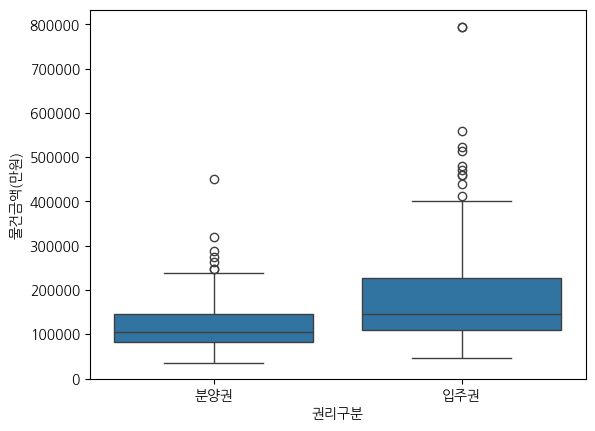

In [31]:
sns.boxplot(data = estate.dropna(subset=['권리구분']), x='권리구분', y='물건금액(만원)')
plt.show()

In [32]:
#상관관계가 높으며 대체적으로 입주권의 가격이 높은게 맞지만 결측치가 너무 많음
#상관관계가 높은 만큼 잘못된 값으로 대체하면 큰 오류가 생길 수 있다 ->결측치는 그대로

# 4-5 층

In [33]:
print(estate['층'].isnull().sum())

2071


In [34]:
pd.crosstab(estate['층'].isnull(), estate['건물용도'])

건물용도,단독다가구,아파트,연립다세대,오피스텔
층,,,,
False,0,38418,17250,6277
True,2071,0,0,0


In [35]:
# 층 열이 결측치인 행 == '건물용도'가 단독다가구
# 다가구 주택은 층수가 3층이하여야 하며, 필로티 구조로 건묵물을 짓게 될 경우 4층까지 건축 가능 
# 단독다가구의 층수를 2층으로

In [36]:
estate['층'] = estate['층'].fillna(2)

In [37]:
#결측치 있는 상태가 rmse값이 더 작았기 때문에 결측치 처리 X

# 4-6 토지 면적

In [38]:
estate[['토지면적(㎡)', '물건금액(만원)']].dropna().corr()

,토지면적(㎡),물건금액(만원)
토지면적(㎡),1.00000,0.01743
물건금액(만원),0.01743,1.00000


In [39]:
estate[estate['토지면적(㎡)'].isnull()]['건물용도'].value_counts()

건물용도
아파트    4573
Name: count, dtype: int64

In [40]:
estate[estate['토지면적(㎡)']==0]['건물용도'].value_counts()

건물용도
아파트    33845
Name: count, dtype: int64

In [41]:
estate[estate['건물용도'] == "아파트"]['토지면적(㎡)'].value_counts()

토지면적(㎡)
0.0    33845
Name: count, dtype: int64

In [42]:
#아파트의 토지면적 데이터가 아예 존재하지 않아 모델 예측 불가능 

In [43]:
# 결측치는 용적률과 건물면적을 반영하여 처리 

In [44]:
estate.loc[estate['토지면적(㎡)'].isnull(), '토지면적(㎡)'] = (
    estate.loc[estate['토지면적(㎡)'].isnull(), '건물면적(㎡)'] / 250 * 100
)

In [45]:
estate.loc[estate['토지면적(㎡)']==0, '토지면적(㎡)'] = (
    estate.loc[estate['토지면적(㎡)']==0, '건물면적(㎡)'] / 250 * 100
)

In [46]:
estate[['토지면적(㎡)', '물건금액(만원)']].corr()

,토지면적(㎡),물건금액(만원)
토지면적(㎡),1.000000,0.092108
물건금액(만원),0.092108,1.000000


In [47]:
estate[estate['건물용도'] == "아파트"]['토지면적(㎡)'].value_counts()

토지면적(㎡)
33.992    1130
33.996     929
33.988     907
23.992     831
23.996     809
          ... 
33.730       1
31.624       1
18.176       1
32.352       1
63.612       1
Name: count, Length: 4804, dtype: int64

# 4-7 신고 구분

In [48]:
estate[estate['신고구분'].isnull()]

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
64014,2024,11440,마포구,11000,노고산동,1.0,NaN,NaN,NaN,NaN,...,195000,157.45,116.7,2.0,NaN,20240417.0,1988.0,단독다가구,NaN,NaN
64015,2024,11305,강북구,10100,미아동,1.0,NaN,NaN,NaN,NaN,...,164000,293.08,136.0,2.0,NaN,20240905.0,1994.0,단독다가구,NaN,NaN


In [49]:
#신고 구분이 없는 두개 값 삭제

In [50]:
estate.dropna(subset = ['신고구분'], inplace=True)

# 5. 각 feature 확인 및 처리

In [51]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64014 entries, 0 to 64013
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   접수연도              64014 non-null  int64  
 1   자치구코드             64014 non-null  int64  
 2   자치구명              64013 non-null  object 
 3   법정동코드             64014 non-null  int64  
 4   법정동명              64014 non-null  object 
 5   지번구분              64014 non-null  float64
 6   지번구분명             61945 non-null  object 
 7   본번                61944 non-null  object 
 8   부번                61944 non-null  object 
 9   건물명               61944 non-null  object 
 10  계약일               64014 non-null  int64  
 11  물건금액(만원)          64014 non-null  int64  
 12  건물면적(㎡)           64014 non-null  float64
 13  토지면적(㎡)           64014 non-null  float64
 14  층                 64014 non-null  float64
 15  권리구분              542 non-null    object 
 16  취소일               2559 non-null   float64
 17

In [52]:
#건물명 삭제

In [53]:
estate.drop(['건물명'], axis=1, inplace=True)

# 5-1 지번구분

In [54]:
#지번구분 열을 삭제하는 것이 rmse가 더 낮게 나옴

In [55]:
estate.drop(['지번구분'], axis=1, inplace=True)

In [56]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64014 entries, 0 to 64013
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   접수연도              64014 non-null  int64  
 1   자치구코드             64014 non-null  int64  
 2   자치구명              64013 non-null  object 
 3   법정동코드             64014 non-null  int64  
 4   법정동명              64014 non-null  object 
 5   지번구분명             61945 non-null  object 
 6   본번                61944 non-null  object 
 7   부번                61944 non-null  object 
 8   계약일               64014 non-null  int64  
 9   물건금액(만원)          64014 non-null  int64  
 10  건물면적(㎡)           64014 non-null  float64
 11  토지면적(㎡)           64014 non-null  float64
 12  층                 64014 non-null  float64
 13  권리구분              542 non-null    object 
 14  취소일               2559 non-null   float64
 15  건축년도              64014 non-null  float64
 16  건물용도              64014 non-null  object 
 17

# 5-2 계약일

In [57]:
estate['계약일'].value_counts()

계약일
20240706    696
20240713    645
20240629    643
20240720    614
20240727    612
           ... 
20240210      1
20231123      1
20231127      1
20231128      1
20231121      1
Name: count, Length: 306, dtype: int64

In [58]:
# 계약일 : 년도-월 합쳐서 새 변수 만드는 것이 열 제거하는 것보다 mse가 적게 나옴 
# 년도-월 변수 생성 후 계약일은 제거

In [59]:
# 계약일의 년도-월을 추출해서 새로운 열 '계약년월' 생성
estate['계약년월'] = estate['계약일'].astype(str).str[:6].astype(int)

In [60]:
# 계약일 열 삭제
estate.drop(['계약일'], axis=1, inplace=True)

In [61]:
estate['계약년월'].value_counts()

계약년월
202407    11444
202406    10038
202408     7987
202405     7831
202403     7215
202404     7089
202402     4955
202401     4875
202312     1614
202409      944
202311       11
202301        3
202207        3
202309        1
202308        1
202307        1
202304        1
202303        1
Name: count, dtype: int64

# 5-3 권리구분&신고구분&건물용도 one hot encoding

<Axes: xlabel='권리구분', ylabel='물건금액(만원)'>

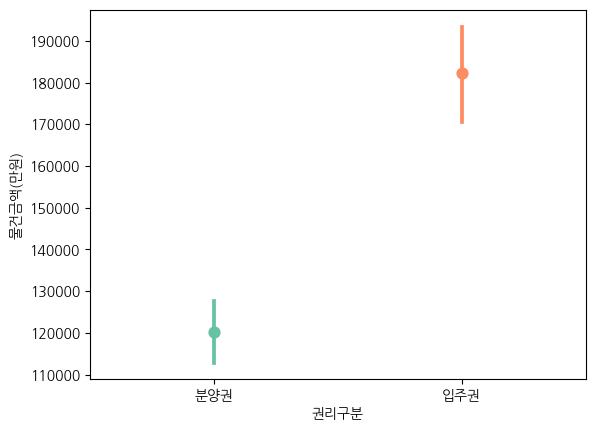

In [62]:
sns.pointplot(x = '권리구분', y = '물건금액(만원)', data = estate[estate['권리구분'].notna()], palette = "Set2")

<Axes: xlabel='신고구분', ylabel='물건금액(만원)'>

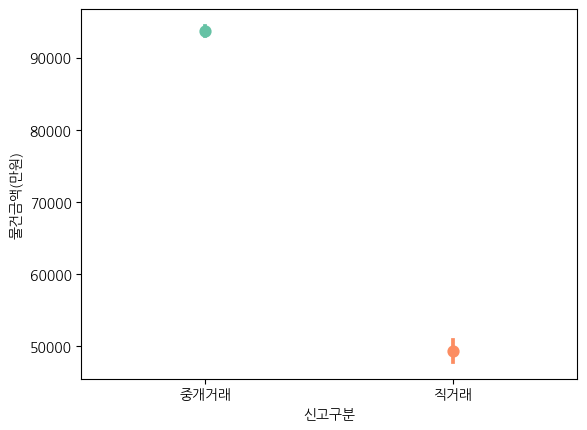

In [63]:
sns.pointplot(x = '신고구분', y = '물건금액(만원)', data = estate, palette = "Set2")

In [64]:
estate = pd.get_dummies(estate, columns=['권리구분'], prefix='권리구분')

In [65]:
estate = pd.get_dummies(estate, columns=['신고구분'], prefix='신고구분')

In [66]:
estate = pd.get_dummies(estate, columns=['건물용도'], prefix='건물용도')

# 5-4 층

In [67]:
# 층 : 10층 단위로 끊고 30층 이상인 층은 '초고층', 마이너스 값은 '지하'로 카테고리 만들기

# 조건에 따라 '층 범주' 열 생성
conditions = [
    estate['층'] < 0,                       # '지하' 조건
    (estate['층'] >= 0) & (estate['층'] <= 10), # '저층' 조건
    (estate['층'] > 10) & (estate['층'] <= 20), # '중층' 조건
    (estate['층'] > 20) & (estate['층'] <= 30), # '고층' 조건
    estate['층'] > 30                       # '초고층' 조건
]

choices = [1, 2, 3, 4, 5]

# '층 범주' 열을 새로 추가
estate['층_범주'] = np.select(conditions, choices, default=np.nan)

In [68]:
estate.drop(['층'], axis = 1, inplace = True) # 기존의 '층'열은 삭제

# 5-5 자치구&법정동코드

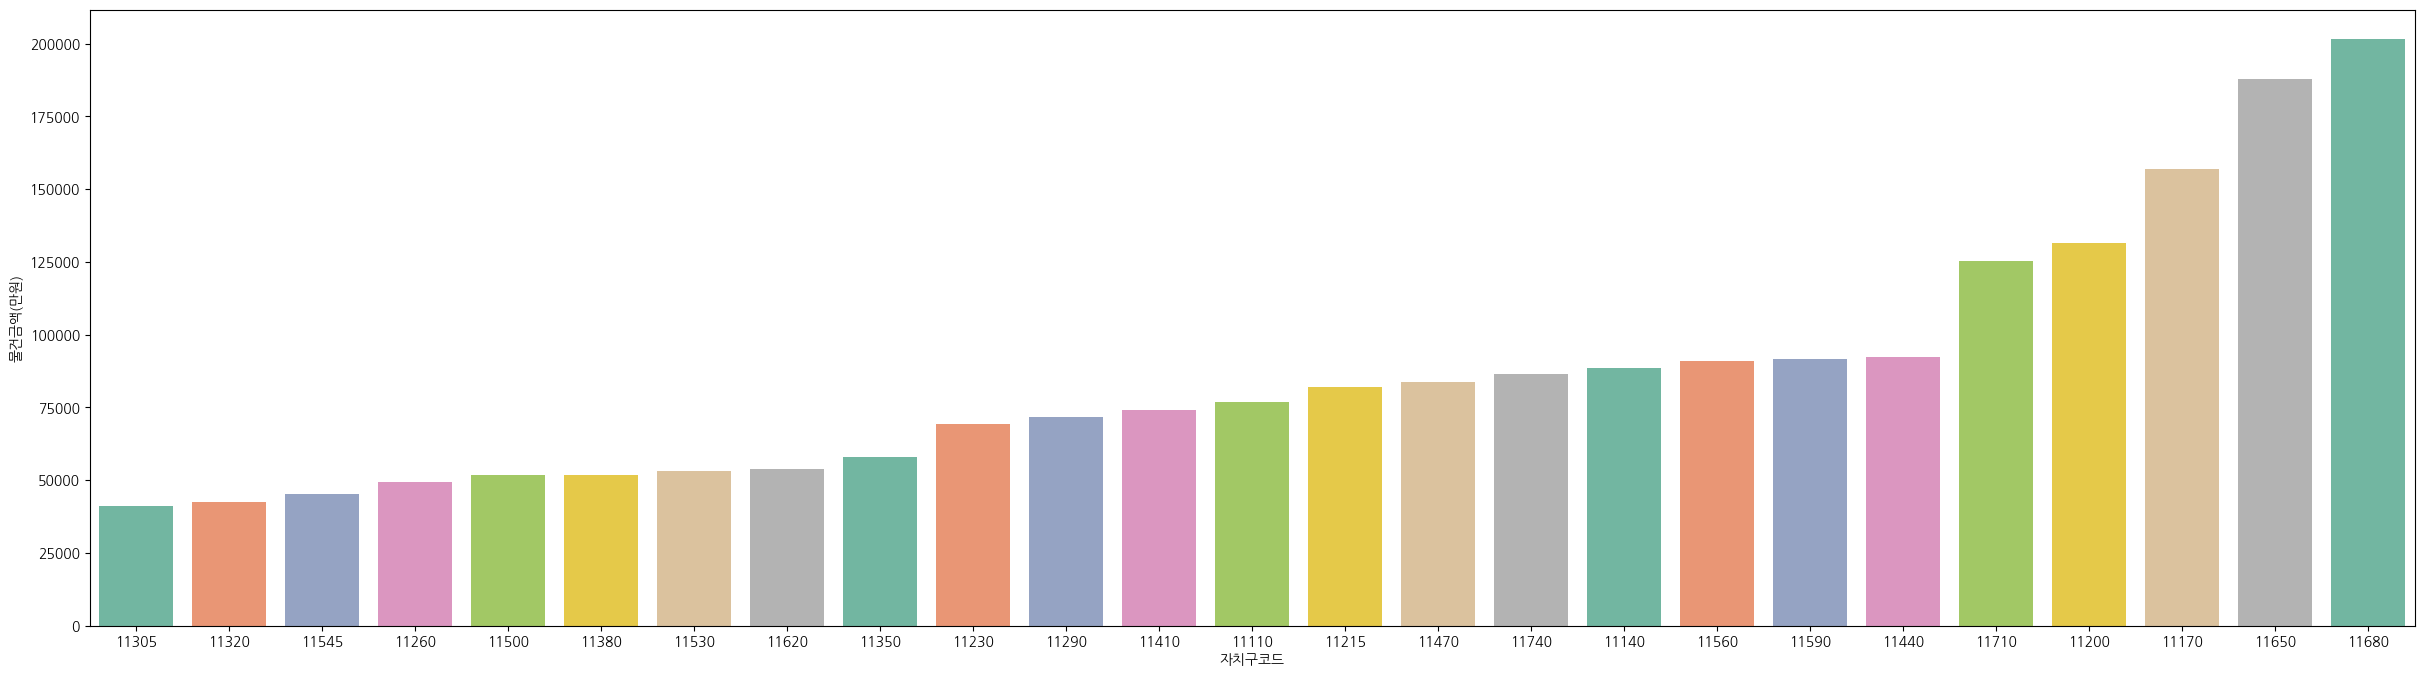

In [69]:
ordered_codes = estate.groupby('자치구코드')['물건금액(만원)'].mean().sort_values().index
plt.figure(figsize=(30,8))
sns.barplot(data=estate, x='자치구코드', y='물건금액(만원)', ci=None, palette='Set2', order=ordered_codes)
plt.show()

In [70]:
# 자치구코드 : 물건금액의 평균값으로 줄세워서 5개씩 묶기

# '자치구코드' 별로 '물건금액'의 평균값 계산
mean_values = estate.groupby('자치구코드')['물건금액(만원)'].mean()

# 평균값을 기준으로 오름차순 정렬
mean_values_sorted = mean_values.sort_values(ascending=True).reset_index()

# 5개씩 묶어서 그룹화하여 자치구코드_범주화 열 생성
mean_values_sorted['자치구코드_범주화'] = (mean_values_sorted.index // 5) + 1

# 원본 데이터프레임에 '자치구코드_범주화'를 매핑
estate = estate.merge(mean_values_sorted[['자치구코드', '자치구코드_범주화']], on='자치구코드', how='left')

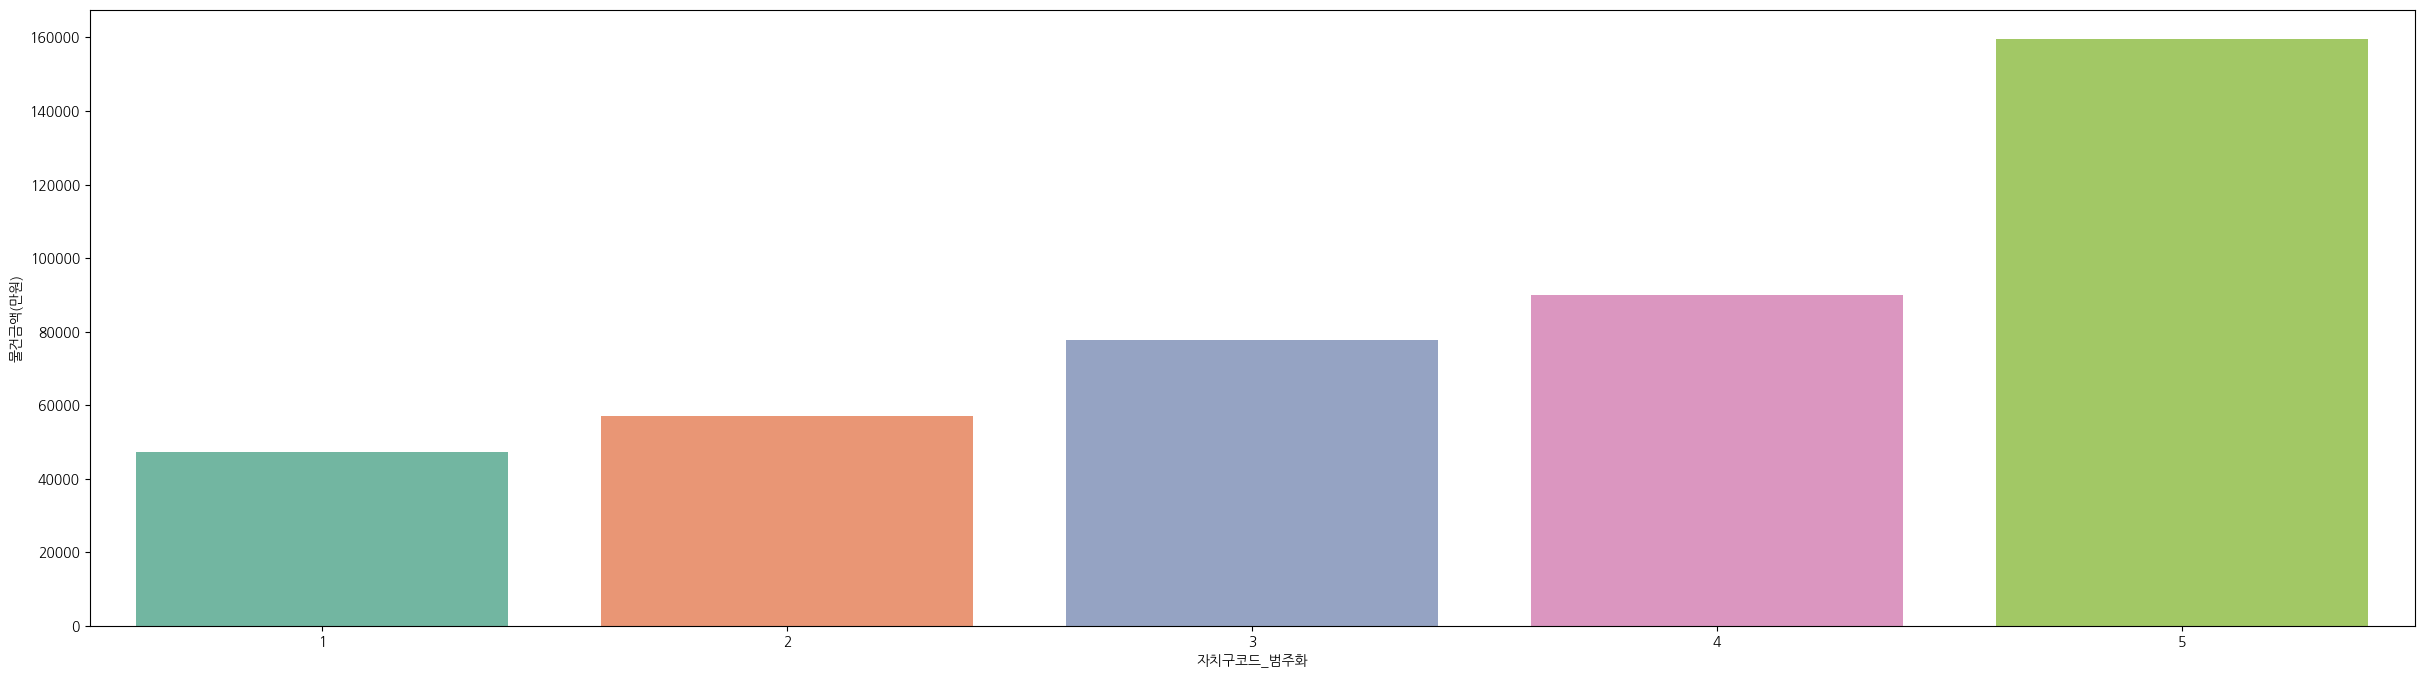

In [71]:
plt.figure(figsize=(30,8))
sns.barplot(data=estate, x='자치구코드_범주화', y='물건금액(만원)', ci=None, palette='Set2')
plt.show()

In [72]:
estate[['자치구코드_범주화', '물건금액(만원)']].corr()

,자치구코드_범주화,물건금액(만원)
자치구코드_범주화,1.000000,0.434893
물건금액(만원),0.434893,1.000000


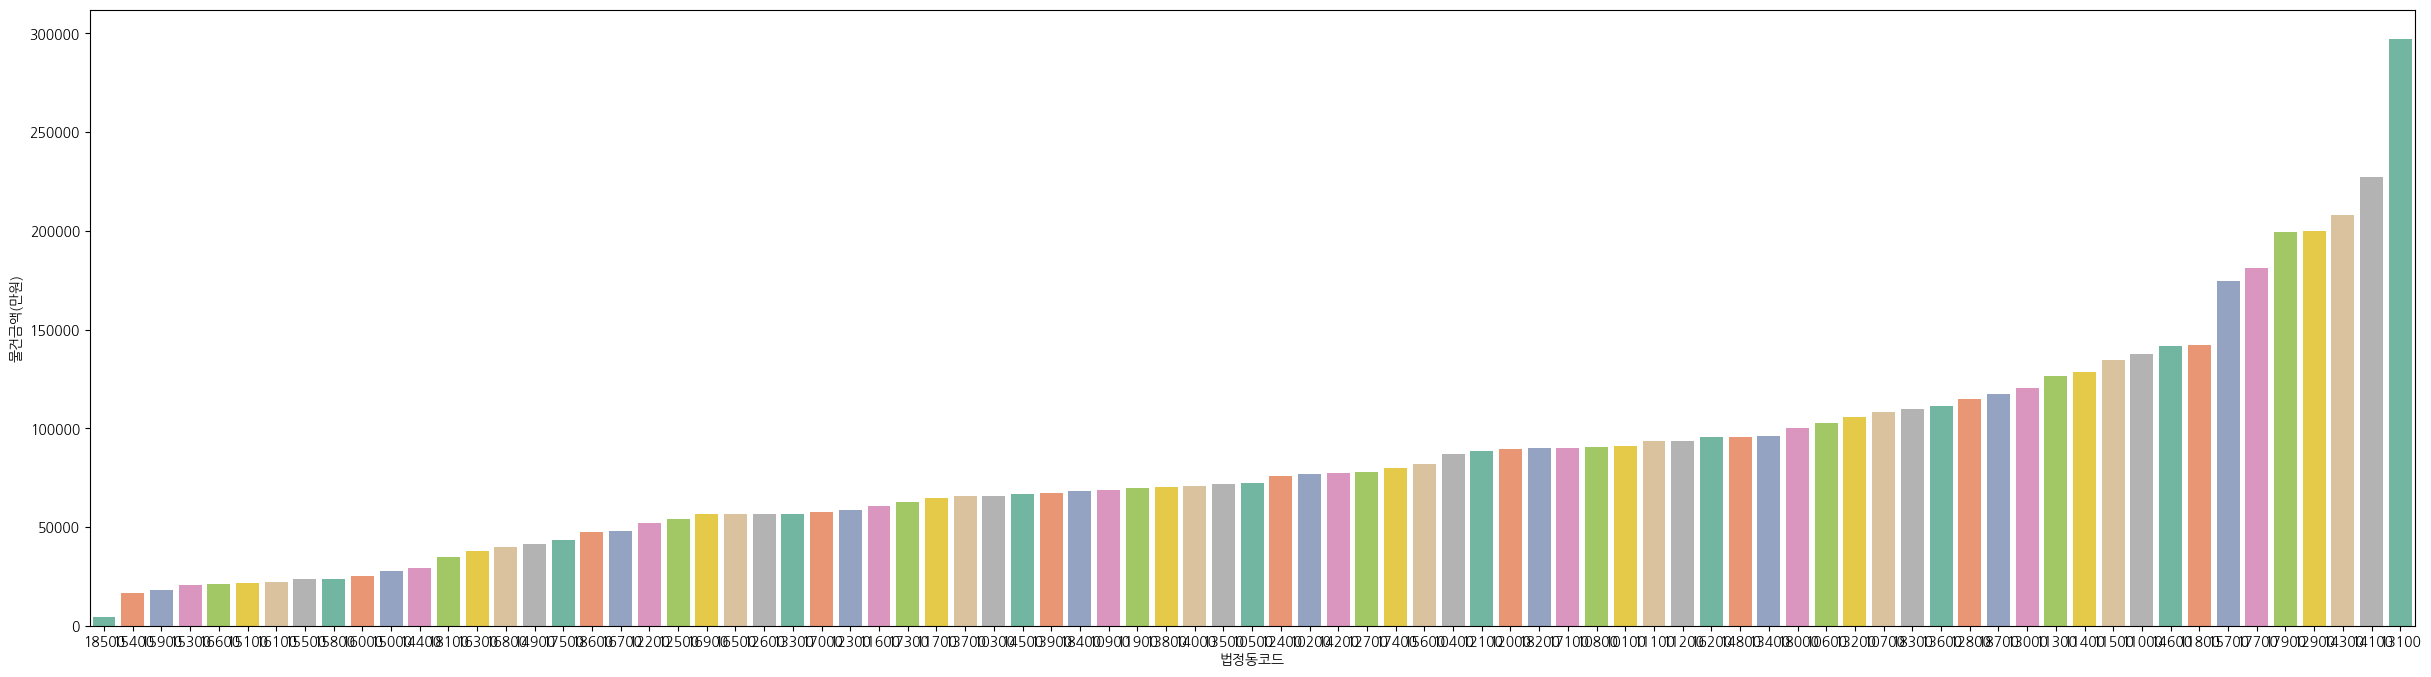

In [73]:
ordered_codes = estate.groupby('법정동코드')['물건금액(만원)'].mean().sort_values().index
plt.figure(figsize=(30,8))
sns.barplot(data=estate, x='법정동코드', y='물건금액(만원)', ci=None, palette='Set2', order = ordered_codes)
plt.show()

In [74]:
# 법정동코드 : 물건금액의 평균값으로 줄세워서 5개씩 묶기

# '법정동코드' 별로 '물건금액'의 평균값 계산
mean_values2 = estate.groupby('법정동코드')['물건금액(만원)'].mean()

# 평균값을 기준으로 오름차순 정렬
mean_values_sorted2 = mean_values2.sort_values(ascending=True).reset_index()

# 5개씩 묶어서 그룹화하여 법정동코드_범주화 열 생성
mean_values_sorted2['법정동코드_범주화'] = (mean_values_sorted2.index // 5) + 1

# 원본 데이터프레임에 '법정동코드_범주화'를 매핑
estate = estate.merge(mean_values_sorted2[['법정동코드', '법정동코드_범주화']], on='법정동코드', how='left')

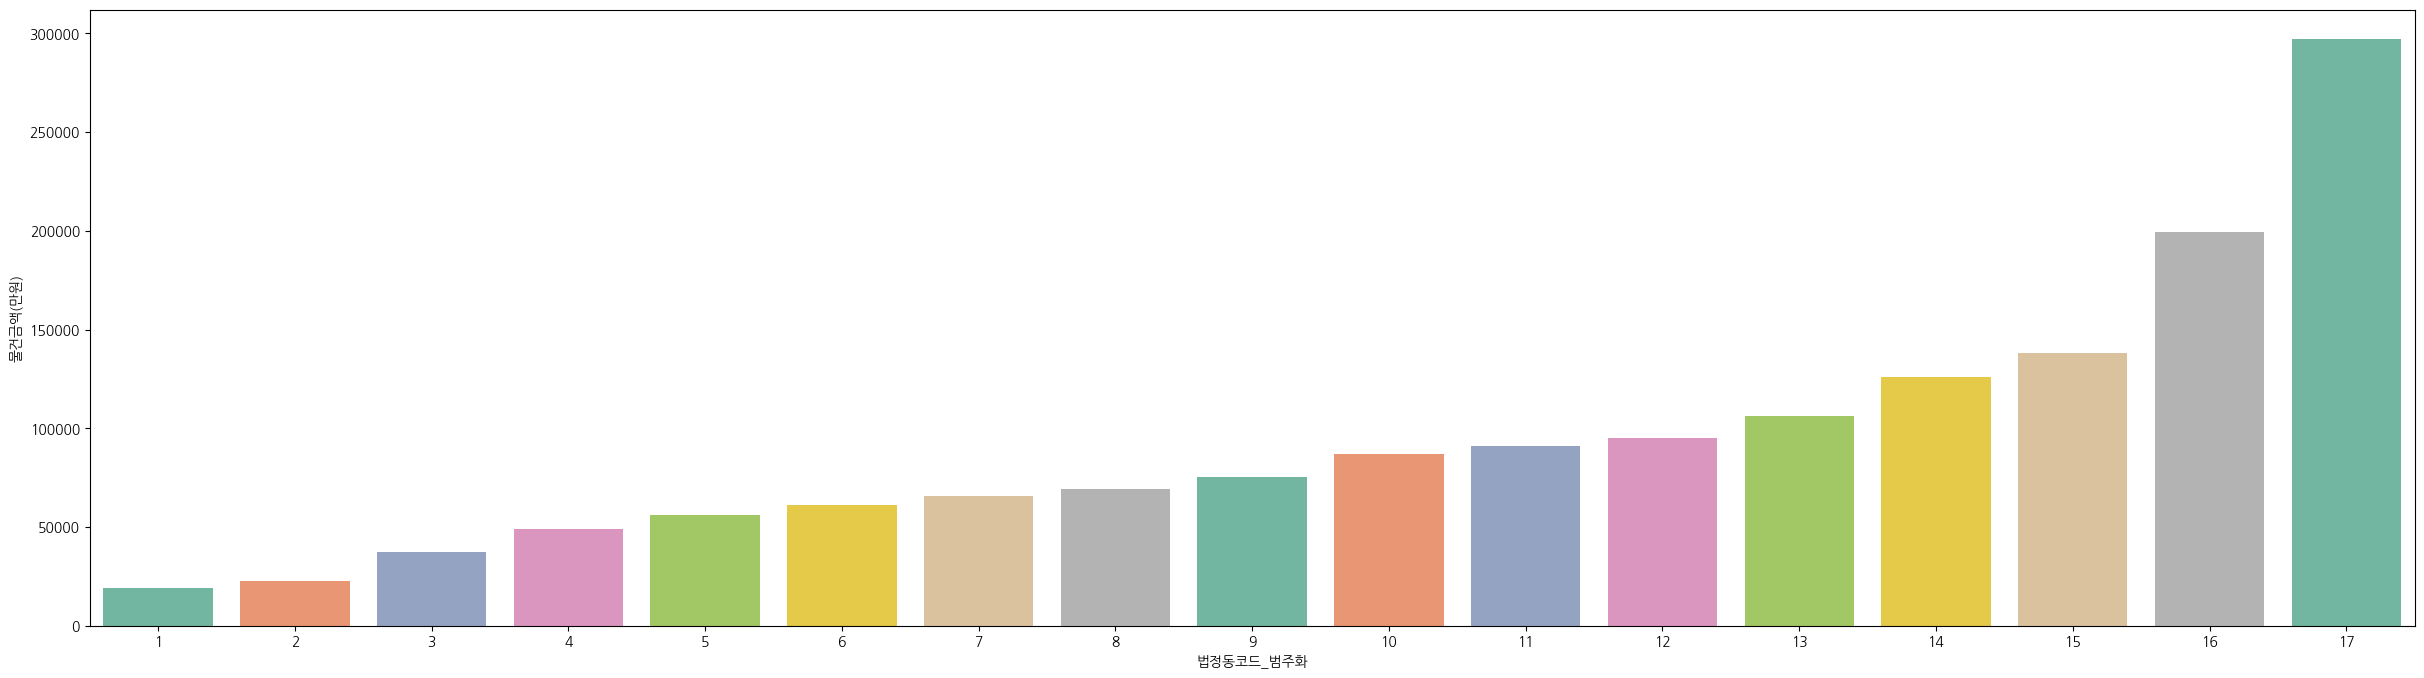

In [75]:
plt.figure(figsize=(30,8))
sns.barplot(data=estate, x='법정동코드_범주화', y='물건금액(만원)', ci=None, palette='Set2')
plt.show()

In [76]:
estate[['법정동코드_범주화', '물건금액(만원)']].corr()

,법정동코드_범주화,물건금액(만원)
법정동코드_범주화,1.000000,0.254164
물건금액(만원),0.254164,1.000000


# 5. 이상치 제거

<Axes: xlabel='건축년도'>

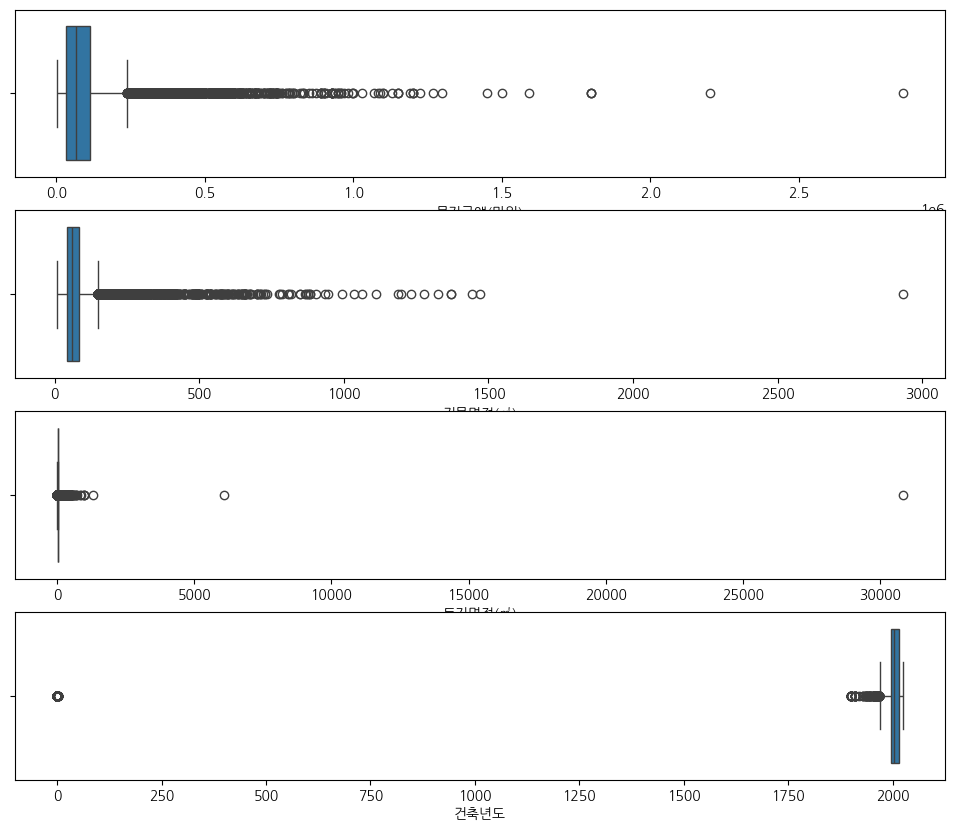

In [77]:
fig, axes = plt.subplots(4, 1, figsize = (12, 10))

sns.boxplot(data = estate, x="물건금액(만원)", ax=axes[0])
sns.boxplot(data = estate, x="건물면적(㎡)", ax=axes[1])
sns.boxplot(data = estate, x="토지면적(㎡)", ax=axes[2])
sns.boxplot(data = estate, x="건축년도", ax=axes[3])

In [78]:
#이상치 처리(3-sigma)

<Axes: xlabel='건축년도'>

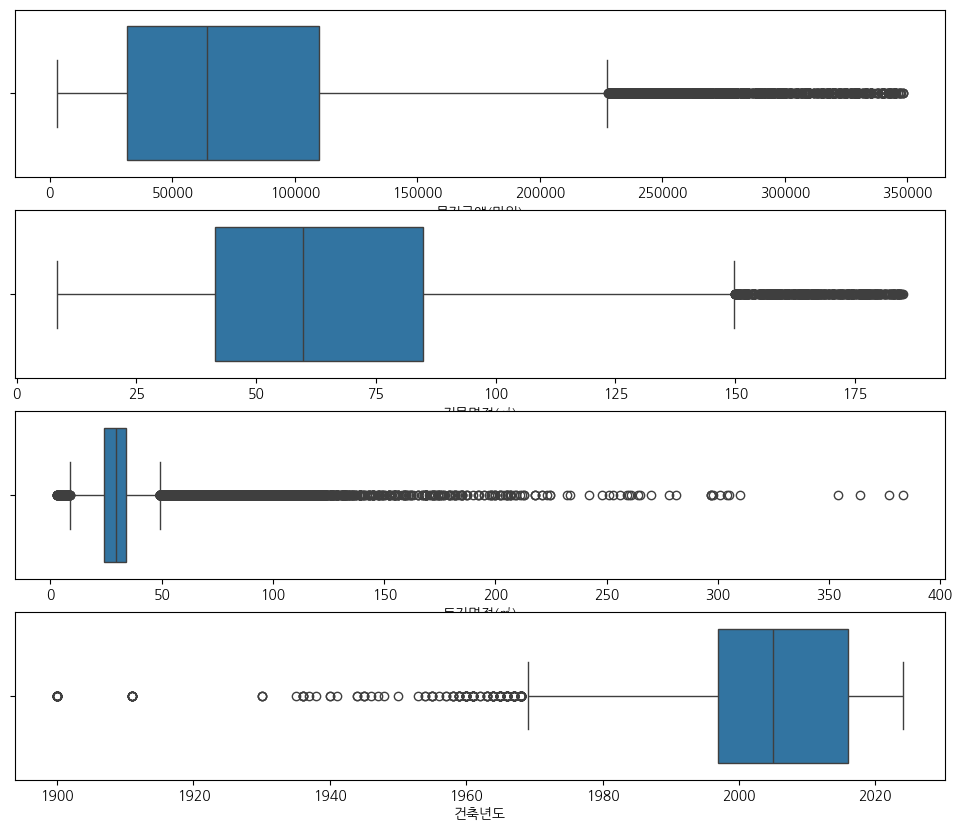

In [79]:
cols = ["물건금액(만원)", "건물면적(㎡)", "토지면적(㎡)", "건축년도"]
for col in cols:
  estate = estate[np.abs(estate[col] - estate[col].mean()) <= (3*estate[col].std())]

fig, axes = plt.subplots(4, 1, figsize = (12, 10))

sns.boxplot(data = estate, x="물건금액(만원)", ax=axes[0])
sns.boxplot(data = estate, x="건물면적(㎡)", ax=axes[1])
sns.boxplot(data = estate, x="토지면적(㎡)", ax=axes[2])
sns.boxplot(data = estate, x="건축년도", ax=axes[3])

# 6. 정규화

((array([-4.23929033, -4.0357528 , -3.92486974, ...,  3.92486974,
          4.0357528 ,  4.23929033]),
  array([ 8.00670085,  8.16080392,  8.24301947, ..., 12.75996063,
         12.75996063, 12.75996063])),
 (0.808121095146916, 10.98948329786714, 0.9935916415202157))

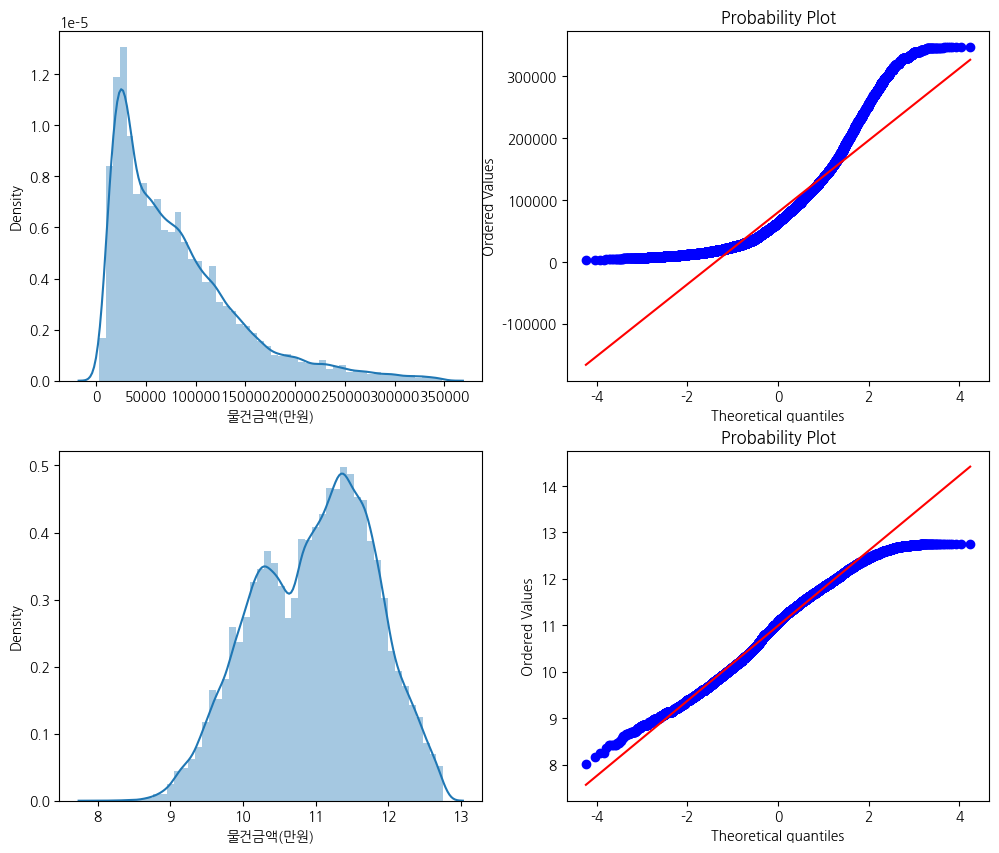

In [80]:
from scipy import stats
figure, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.distplot(estate['물건금액(만원)'], ax=axes[0][0])
stats.probplot(estate['물건금액(만원)'], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log1p(estate['물건금액(만원)']), ax=axes[1][0])
stats.probplot(np.log1p(estate['물건금액(만원)']), dist='norm', fit=True, plot=axes[1][1])

((array([-4.23929033, -4.0357528 , -3.92486974, ...,  3.92486974,
          4.0357528 ,  4.23929033]),
  array([1.38629436, 1.38629436, 1.38629436, ..., 5.89989735, 5.9348942 ,
         5.95064255])),
 (0.4173697066836439, 3.395875698796182, 0.9703870657567183))

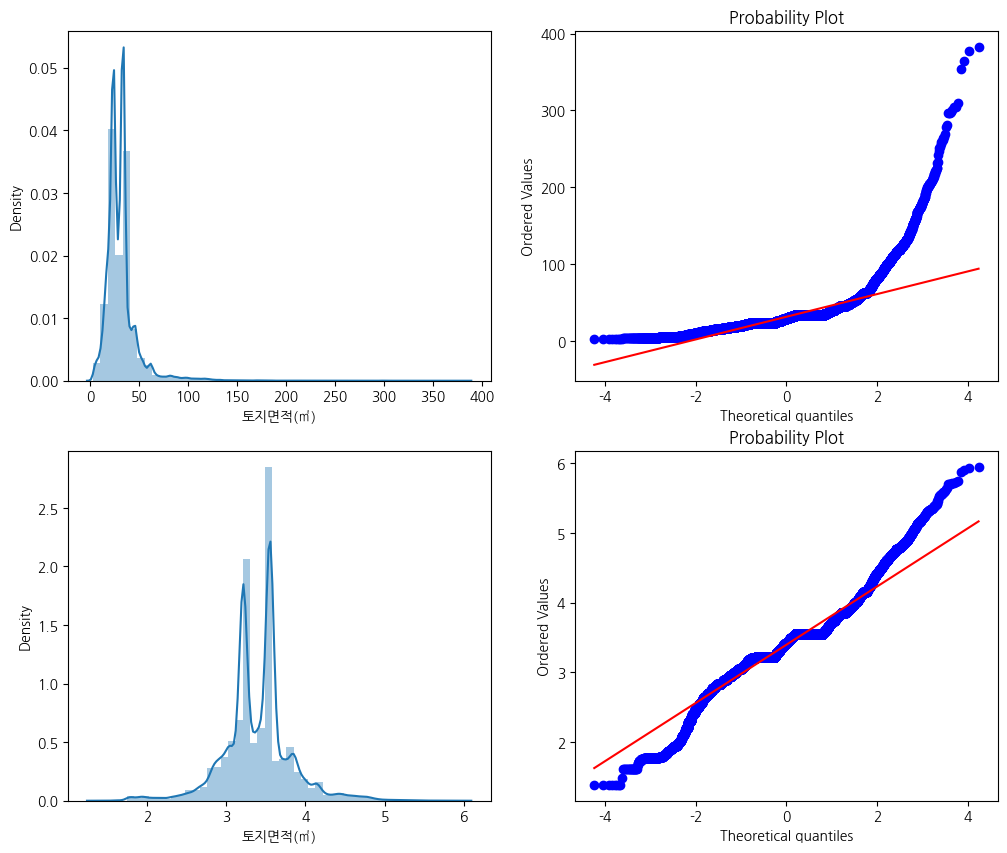

In [81]:
figure, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.distplot(estate['토지면적(㎡)'], ax=axes[0][0])
stats.probplot(estate['토지면적(㎡)'], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log1p(estate['토지면적(㎡)']), ax=axes[1][0])
stats.probplot(np.log1p(estate['토지면적(㎡)']), dist='norm', fit=True, plot=axes[1][1])

((array([-4.23929033, -4.0357528 , -3.92486974, ...,  3.92486974,
          4.0357528 ,  4.23929033]),
  array([2.24918432, 2.2617631 , 2.26488323, ..., 5.22375545, 5.22467083,
         5.22537026])),
 (0.4807524449000181, 4.043473936371189, 0.9788407724734131))

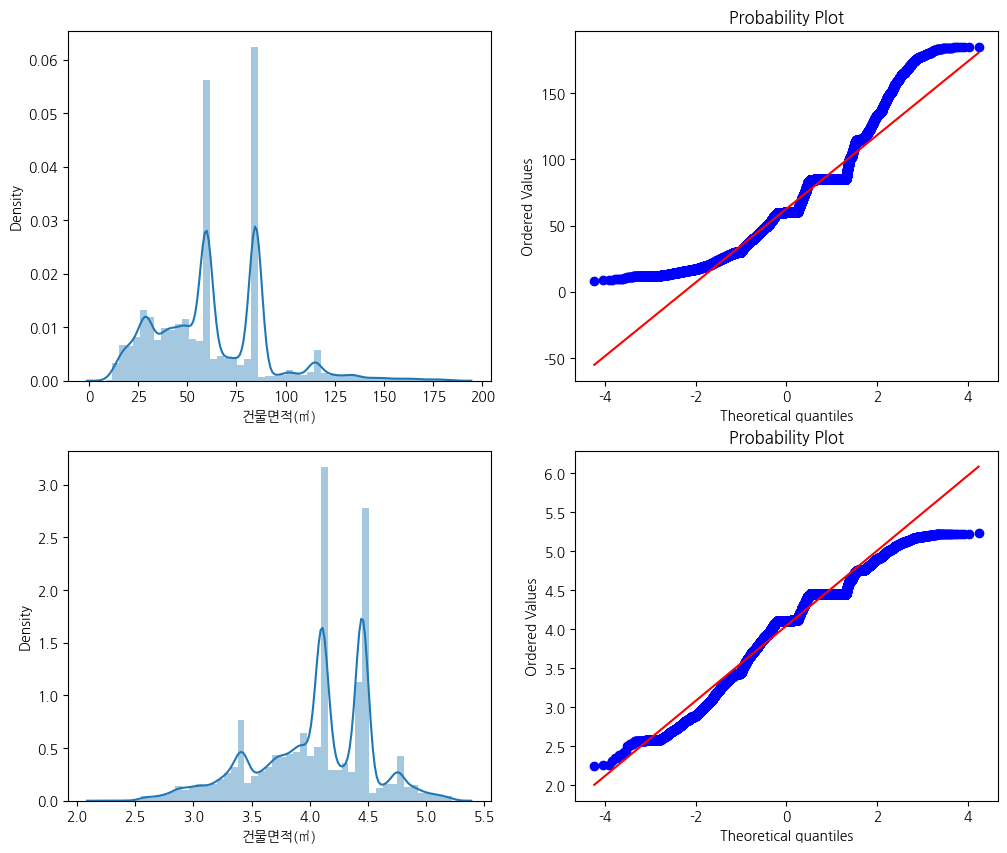

In [82]:
figure, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.distplot(estate['건물면적(㎡)'], ax=axes[0][0])
stats.probplot(estate['건물면적(㎡)'], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log1p(estate['건물면적(㎡)']), ax=axes[1][0])
stats.probplot(np.log1p(estate['건물면적(㎡)']), dist='norm', fit=True, plot=axes[1][1])

In [83]:
estate['물건금액_log'] = np.log1p(estate['물건금액(만원)'])
estate['건물면적_log'] = np.log1p(estate['건물면적(㎡)'])
estate['토지면적_log'] = np.log1p(estate['토지면적(㎡)'])

In [84]:
estate.drop(columns = ['건물면적(㎡)','토지면적(㎡)'], inplace=True)

In [85]:
estate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61825 entries, 0 to 64013
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   접수연도              61825 non-null  int64  
 1   자치구코드             61825 non-null  int64  
 2   자치구명              61824 non-null  object 
 3   법정동코드             61825 non-null  int64  
 4   법정동명              61825 non-null  object 
 5   지번구분명             60715 non-null  object 
 6   본번                60714 non-null  object 
 7   부번                60714 non-null  object 
 8   물건금액(만원)          61825 non-null  int64  
 9   취소일               2395 non-null   float64
 10  건축년도              61825 non-null  float64
 11  신고한 개업공인중개사 시군구명  54758 non-null  object 
 12  계약년월              61825 non-null  int32  
 13  권리구분_분양권          61825 non-null  bool   
 14  권리구분_입주권          61825 non-null  bool   
 15  신고구분_중개거래         61825 non-null  bool   
 16  신고구분_직거래          61825 non-null  bool   
 17

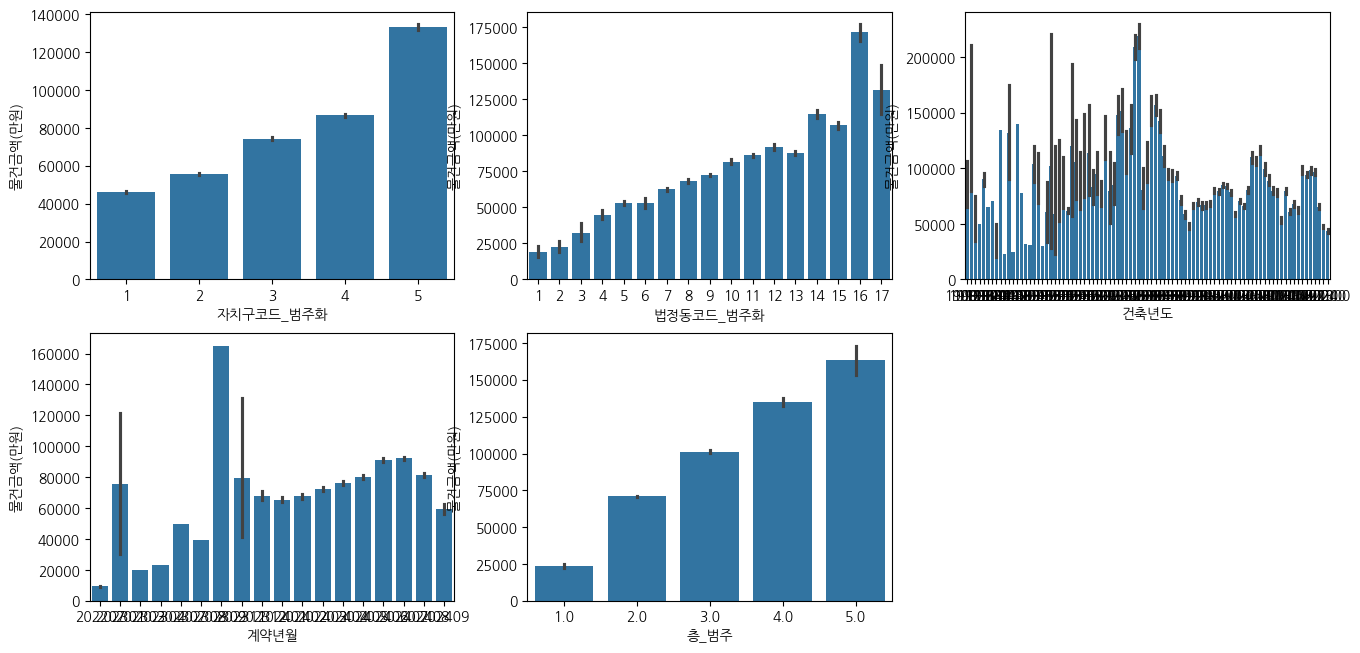

In [86]:
plt.figure(figsize=(16,16))
plt.subplot(4,3,1)
sns.barplot(x='자치구코드_범주화',y='물건금액(만원)',data=estate)
plt.subplot(4,3,2)
sns.barplot(x='법정동코드_범주화',y='물건금액(만원)',data=estate)
plt.subplot(4,3,3)
sns.barplot(x='건축년도',y='물건금액(만원)',data=estate)
plt.subplot(4,3,4)
sns.barplot(x='계약년월',y='물건금액(만원)',data=estate)
plt.subplot(4,3,5)
sns.barplot(x='층_범주',y='물건금액(만원)',data=estate)
plt.show()

In [87]:
estate.to_csv('estate_preprocessed.csv', index=False)